# Natural Language Processing - Group Assignment Task 2
## Group 6
##### Robert Brunnsteiner, Mohammad Mahdi Fallah, Akshey Kumar, Jan-Jonas Schumacher
VU Data Mining (WS 2021/22)

### Task:

Task-2 is about exploring the potential of CNNs (Convolutional Neural Networks) for text classification and more specifically for sentiment analysis [12]. The generic CNN architecture you need to use is depicted in Figure 1. The dataset to be used is the IMDB Movie review dataset described in [16]. It consists of 25 000 positive and 25 000 negative movie reviews and is available for free. There are also 50 000 unlabeled samples which will not be used for this task. After extracting the downloaded archive, you should collect the texts of each file, organize them as a dataframe and store it as a CSV file. For this, you can run the code of Listing 1 on the same path where you have aclImdb folder.

## Imports and requirements

In [ ]:
#!pip install -r requirements.txt

In [12]:
# Task 2a
import os
import pandas as pd
from sklearn.utils import shuffle
import string, nltk
from nltk.tokenize import RegexpTokenizer
import re

# Task 2b and 2c
import numpy as np
import random, sys
import tensorflow
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Dense, Conv1D, GlobalMaxPooling1D, MaxPooling1D, AveragePooling1D, Flatten, Concatenate, LeakyReLU, Dropout
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.utils import plot_model 
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import callbacks
import pydot
import graphviz
import matplotlib.pyplot as plt
import keras_tuner as kt



## NLP Task 2-a
Task: In this step you will perform preprocessing of the review part of each data sample. Start by printing the raw review field of a dataframe sample with index X (you pick X yourself). Then, write a function to preprocess the texts and apply it in each review cell of the dataframe entries. The function must lowercase the text. It must also replace every number occurrence (integer or float) with a single ‘#’ symbol. Furthermore, you should make sure to keep (or save and add again) all smiley symbols which are very helpful sentiment polarityanalysis features. Besides‘#’ and smileys, all other punctuation or special symbols must be removed. After applying the function in the entire dataframe print the preprocessed text of the same sample X to show how it changed.

### Our approach:
Write something here...

In [13]:
# Listing 1: Python code for preparing IMDB movie review dataset
# Runtime ~1 minute

labels = {'pos':1, 'neg':0} # data labels
df = pd.DataFrame() # dataframe for holding the samples

# walking through the folder structure
for s in ('test', 'train'): 
    for l in ('pos', 'neg'):
        path ='./aclImdb/%s/%s' % (s, l) 
        for file in os.listdir (path):
            with open(os.path.join(path, file), 'r', encoding='utf8') as infile:
                txt = infile.read () # read content of each file
            df = df.append([[txt , labels[l]]], ignore_index=True)

# name of data columns
df.columns = ['review', 'polarity']
# randomly shuffle dataframe samples
df = shuffle(df, random_state=7)
# save dataframe to CSV file
df.to_csv ('./review_samples.csv', index=False)

In [14]:
# preprocess function
def preprocess(dataset):
    rows = dataset.shape[0]
    
    #this tokenizer takes words, the # symbol and smilies as tokens and discards the rest
    tokenizer = RegexpTokenizer(r'\w+|#|(?::|;|=)(?:-)?(?:\)|\(|\\|\/|D|P)')
    
    #loop over all rows and preprocess the reviews
    for i in range(rows):
        # text to lower case
        dataset.iloc[i, 0] = (dataset.iloc[i, 0]).lower()
        # substitute floats and integers to #
        dataset.iloc[i, 0] = re.sub(r'[+-]?([0-9]*[.])?[0-9]+', '#', dataset.iloc[i, 0])
        # remove punctuation other than # and smilies using the tokenizer defined above
        dataset.iloc[i, 0] = ' '.join(tokenizer.tokenize(dataset.iloc[i, 0]))

### Results:

In [15]:
# Write/show Results here?

In [16]:
# Runtime ~4 minutes
data = pd.read_csv('review_samples.csv')
print(data.iloc[1337, 0])

print('***********************************')

preprocess(data)
print(data.iloc[1337, 0])
data.to_csv ('./review_preprocessed.csv', index=False)

I know it sounds crazy but yes, I am a huge fan of House Party 1 and 2 (and proud of it!!). I hated part 3, and then here comes part 4. I was like are you kidding me with this? Kid 'n Play are nowhere to be found in this movie, and that would've been okay, had they not foolishly entitled the movie House Party 4, as if it was in any way, shape, form, or fashion related to its predecessors. Every time this movie comes on late at night on USA, I shoot my TV with a rifle. Quite frankly, it really is just that atrocious. *hurling*<br /><br />As the only remaining fan of Kid 'n Play that will actually admit to being a fan (tee hee hee), I was appalled. Remember that stupid little boy group Immature? They snuck their way into House Party 3. Okay, fine and well but how can part 4 be just about them and nothing else and it also seems like they're not even the same kids from part 3. *confused!!!!* House Party fans: do yourself a favor and stick to House Party 1 and 2 and Class Act. Beyond that, 

## NLP Task 2-b
Task: In this step you will implement a “vanilla” model of the architecture. 
For this you will need to use PyTorch or Tensorflow/Keras functional API and various layers
like Input, Embedding, Conv1D, Dropout, MaxPooling1D, Flatten, concatenate, Dense, etc. as well as
other utility functions such as Tokenizer. For some of the parameters, you should consider the values
suggested in Table 1. Please note that those values are “typical” but not necessarily optimal. First, you need to tokenize the texts and cut/pad them to a common max length size. Then you derive the train and test samples and labels. The “vanilla” model should contain the Embedding layer, a single convolution layer of only one block followed by a max-pooling layer and a single dense layer. You will report the classification accuracy of this model.


### Our approach:

In this task we created a basic vanilla model with and without parameter optimization. For optimization, we used the Keras tuner framework. Before creating the model, we defined the necessary parameters shown in the cell below. Before creating and training the model we prepared the data from task 2a. Therefore, we loaded the 'review_preprocessed.csv' file and split the data in a training and test set using the 'SPLIT_DATA' variable and using the random state for reproducibility. Next, we used the Tensorflow Tokenizer to vectorize a text corpus by turning them into a sequence of integers. Finally, we used Tensorflows pad_sequences to create a common max length by padding or cutting the review entries to a common length specified by the parameter 'UNIFORM_LENGTH'.

Now we were able to create a basic vanilla model to predict the proximity of a movie review. We used the functional API of Keras and created an Input, Embedding, Convolution(1D), MaxPooling, MaxPooling1D, Flatten, Dropout and an Output layer. We added the dropout layer to deal with the overfitting of our model. The model summary is shown below. We compiled the model with the loss 'binary_crossentropy' loss, the 'adam' optimizer and the metrics as 'accuracy'. In the end, we used the fit function with BATCH_SIZE=16 and EPOCHS=3 variables and defined a validation split of 0.2. We evaluated the model with the test data.

We were also interested if the recommended parameters in the cell below would improve our accuracy further. Therefore, we used the Keras tuner framework with a Hyperband search to get more insight. The architecture was identical as before. We performed hyperparameter optimization over the following parameters: LEARNING_RATE, WORD_EMBEDDING_DIM, UNIFORM_LENGTH, CONV_FILTERS, KERNEL_SIZE, DROPOUT. 

The Vocabulary was fixed to 30.000. We did not optimize over the BATCH_SIZE and UNIFORM_LENGHT parameters. 

#### Parameters (Recommendation)

W or number of convolution blocks in each layer: 2-5.  
L or number of consecuetive convolution-pooling layers: 2-4  
Maximal length of each review sequence: 300-500    
Dimension of word embbeddings: 150-300.  
Train : Test split of the data samples: 4:1 or 9:1.  
Number of filters in each convolution layer: 10-50.  
Kernel size in each convolution block: 1-5.  

Here we set up the parameters for our model.

In [17]:
# Number of convolution blocks in each layer
# W = 1
# Number of consecuetive convolution-pooling layers
# L = 1
#  Max lenght of each review sequence
UNIFORM_LENGTH = 300
# The dimension of the word embeddings
WORD_EMBEDDING_DIM = 150
# Train : Test split
SPLIT_DATA = 0.8
# Number of filters in each convolution layer
CONV_FILTERS = 10
# Kernel size in each convolution block
KERNEL_SIZE = 1
# Vocabulary: number of most frequent words
VOCABULARY = 30000
# POOL_SIZE: Downsamples the input representation by taking the maximum value 
POOL_SIZE = 2
# Training and evaluation:
EPOCHS = 3
BATCH_SIZE = 16
VERBOSE = 1

### Loading and preparing data

Loading the pre-processed data and splitting them into train and test sets. Random state is fixed for reproducibility.

In [18]:
df = pd.read_csv('review_preprocessed.csv')
training_data = df.sample(frac=SPLIT_DATA, random_state=25)
testing_data = df.drop(training_data.index)

print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")

No. of training examples: 40000
No. of testing examples: 10000


In [19]:
### Converting the pandas dataframe to lists and numpy arrays
X_train = training_data.loc[:,'review'].to_list()
X_test = testing_data.loc[:,'review'].to_list()
y_train = training_data.loc[:,'polarity'].to_numpy()
y_test = testing_data.loc[:,'polarity'].to_numpy()

In [20]:
### Variables for original (not vectorized) data
X_train_text = X_train
X_test_text = X_test

The Tokenize class helps us to vectorize a text corpus by tunring them into a sequence of integers. 

In [21]:
t  = Tokenizer(num_words = VOCABULARY)

t.fit_on_texts(X_train)
X_train_enc = t.texts_to_sequences(X_train)
X_test_enc = t.texts_to_sequences(X_test)

Here we force a uniform length for each review. Longer reviews are truncated and shorted reviews and padded with zeros.

In [22]:
X_train_pad = pad_sequences(X_train_enc, maxlen=UNIFORM_LENGTH)
X_test_pad = pad_sequences(X_test_enc, maxlen=UNIFORM_LENGTH)

X_train = X_train_pad
X_test = X_test_pad

### CNN vanilla model 

In [23]:
### With Keras functional API
inputs = Input(shape=(UNIFORM_LENGTH,))
x = Embedding(VOCABULARY, WORD_EMBEDDING_DIM, input_length=UNIFORM_LENGTH)(inputs)
x = Conv1D(filters=CONV_FILTERS, kernel_size=KERNEL_SIZE, activation='relu')(x)
x = MaxPooling1D(pool_size=POOL_SIZE)(x)
x = Flatten()(x)
x = Dropout(.8)(x)
outputs = Dense(1, activation='sigmoid')(x)
model = Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 300)]             0         
                                                                 
 embedding (Embedding)       (None, 300, 150)          4500000   
                                                                 
 conv1d (Conv1D)             (None, 300, 10)           1510      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 150, 10)          0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 1500)              0         
                                                                 
 dropout (Dropout)           (None, 1500)              0         
                                                             

2022-01-14 17:11:40.351866: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [24]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Callback for tensorboard VIS
tb_callback = callbacks.TensorBoard(log_dir="logs/", histogram_freq=1)
history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2, callbacks=[tb_callback])

Epoch 1/3
2000/2000 [==============================] - 60s 30ms/step - loss: 0.5746 - accuracy: 0.6695 - val_loss: 0.3716 - val_accuracy: 0.8394
Epoch 2/3
2000/2000 [==============================] - 59s 30ms/step - loss: 0.3910 - accuracy: 0.8242 - val_loss: 0.3324 - val_accuracy: 0.8618
Epoch 3/3
2000/2000 [==============================] - 59s 29ms/step - loss: 0.3349 - accuracy: 0.8547 - val_loss: 0.3097 - val_accuracy: 0.8730


In [25]:
# Evaluate Vanilla model
score = model.evaluate(X_test, y_test)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

313/313 [==============================] - 1s 2ms/step - loss: 0.3133 - accuracy: 0.8707
Test loss: 0.3133133053779602 / Test accuracy: 0.8707000017166138


#### Accuracy

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


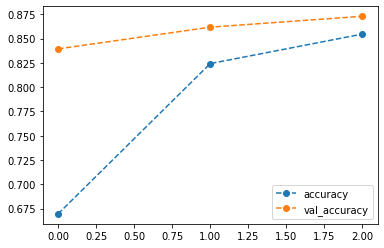

In [26]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'], label = "accuracy", linestyle='--', marker='o')
plt.plot(history.history['val_accuracy'], label = "val_accuracy", linestyle='--', marker='o')
plt.legend()
plt.show()

### Results:

The learning curve shows that the model is well-fit to the data, i.e. it is neither overfit nor underfit. Initially, we encountered overfitting as the training accuracy was much higher than the validation accuracy. To tackle this, we incorporated a dropout layer. Subsequently, the learning curves improved, and as we see, the training and validation accuracy is nearly equal by the second epoch. Classification accuracy of 0.87 on unseen data shows us that our model performs rather well at classifying the reviews.

#### Investigating the missclassified results
Here we investigate what kind of samples are wrongly classified.

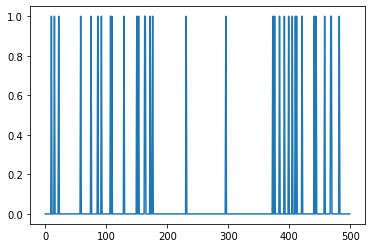

Review: 10
this movie was the most horrible movie watching experience i have ever had to endure and what is worse is the fact that i had to watch it and didn t have the opportunity to stop it because it was for school admittedly the storyline was decent but i found the acting terrible the exception was marianne jean baptiste i thought her performance was wonderful she was the only highlight without her i doubt i would have been able to bear watching the film every time i hear somebody say daarling i cringe i nearly attacked a customer the other day because they said it it made me remember one of the worst one and a half hours of my life br br i apologise if this has offended anybody i am only expressing my opinion
Correct: 0 Prediction: 1
False positive
********************
Review: 15
skip all the subjective this is a great film reviews and read the imdb trailer or the back the kino videobox which includes both versions of this flick which i ll paraphrase to the tune of sci fi score by

/var/folders/5v/wrnrfs9x5z30cjvp_ytqb1pc0000gn/T/ipykernel_52452/3873377048.py:7: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  wrong_class=[X_train_text[i] for i in difference]


In [27]:
amount = 500
ypred = (model(X_train[:amount]).numpy() > 0.5).astype(int).reshape(amount)
difference =  ypred != y_train[:amount]
plt.plot(difference)
plt.show()
wrong_idx = list(np.where(difference)[0])
wrong_class=[X_train_text[i] for i in difference]
False_negative = 0
False_positive = 0
for i in range(0, len(wrong_idx)):
    
    print("Review:", wrong_idx[i])
    print(X_train_text[i])
    print("Correct:", y_train[wrong_idx[i]], "Prediction:",  ypred[wrong_idx[i]])
    if(y_train[wrong_idx[i]] == 1):
        print("False negative")
        False_negative += 1
    if(y_train[wrong_idx[i]] == 0):
        print("False positive")
        False_positive += 1
    print("********************")
    


20 13


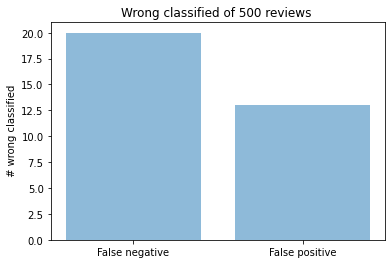

In [28]:
print(False_negative, False_positive)
objects = ('False negative', 'False positive')
y_pos = np.arange(len(objects))
performance = [False_negative, False_positive]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel(' # wrong classified')
plt.title(f'Wrong classified of {amount} reviews ')

plt.show()

### CNN vanilla model with keras tuner


In [29]:
def call_existing_code(LEARNING_RATE, VOCABULARY, WORD_EMBEDDING_DIM, UNIFORM_LENGTH, CONV_FILTERS, KERNEL_SIZE, DROPOUT):
    inputs = Input(shape=(UNIFORM_LENGTH,))
    x = Embedding(VOCABULARY, WORD_EMBEDDING_DIM, input_length=UNIFORM_LENGTH)(inputs)
    x = Conv1D(filters=CONV_FILTERS, kernel_size=KERNEL_SIZE, activation='relu')(x)
    x = MaxPooling1D(pool_size=POOL_SIZE)(x)
    x = Flatten()(x)
    x = Dropout(DROPOUT)(x)
    x = Dense (100, activation='relu')(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=inputs, outputs=outputs)
    plot_model(model, to_file='vanilla_model.png', show_shapes=True)
    model.compile(
        optimizer=Adam(learning_rate=LEARNING_RATE),
        #optimizer='adam',
        loss="binary_crossentropy",
        metrics=["accuracy"],
    )
    return model


def build_model(hp):
    LEARNING_RATE = hp.Float('learning_rate',min_value=1e-5,max_value=1e-2,sampling='LOG',default=1e-3)
    VOCABULARY = 30000
    WORD_EMBEDDING_DIM = hp.Int("output_dim", min_value=150, max_value=300, step=50)
    UNIFORM_LENGTH = 300
    CONV_FILTERS = hp.Int("filters", min_value=10, max_value=50, step=10)
    KERNEL_SIZE = hp.Int("kernel_size", min_value=1, max_value=5, step=1)
    DROPOUT = hp.Float('dropout', min_value=0.0, max_value=0.8, default=0.5, step=0.1)

    # call existing model-building code with the hyperparameter values.
    model = call_existing_code(
        LEARNING_RATE = LEARNING_RATE,
        VOCABULARY=VOCABULARY, 
        WORD_EMBEDDING_DIM=WORD_EMBEDDING_DIM, 
        UNIFORM_LENGTH=UNIFORM_LENGTH, 
        CONV_FILTERS=CONV_FILTERS, 
        KERNEL_SIZE=KERNEL_SIZE,
        DROPOUT = DROPOUT
        )

    return model

build_model(kt.HyperParameters())


In [30]:
tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=4,
    overwrite=True,
    directory="tmp/tb")
    
tuner.search_space_summary()

Search space summary
Default search space size: 5
learning_rate (Float)
{'default': 0.001, 'conditions': [], 'min_value': 1e-05, 'max_value': 0.01, 'step': None, 'sampling': 'log'}
output_dim (Int)
{'default': None, 'conditions': [], 'min_value': 150, 'max_value': 300, 'step': 50, 'sampling': None}
filters (Int)
{'default': None, 'conditions': [], 'min_value': 10, 'max_value': 50, 'step': 10, 'sampling': None}
kernel_size (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 5, 'step': 1, 'sampling': None}
dropout (Float)
{'default': 0.5, 'conditions': [], 'min_value': 0.0, 'max_value': 0.8, 'step': 0.1, 'sampling': None}


In [31]:
stop_early = callbacks.EarlyStopping(monitor='val_loss', patience=5)
tuner.search(X_train, y_train, epochs=8, validation_split=0.2, callbacks=[stop_early, callbacks.TensorBoard("tmp/tb_logs")])
# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]


Trial 10 Complete [00h 04m 32s]
val_accuracy: 0.8995000123977661

Best val_accuracy So Far: 0.9013749957084656
Total elapsed time: 00h 30m 28s
INFO:tensorflow:Oracle triggered exit


Train model:

In [32]:
# Build the model with the optimal hyperparameters and train it
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train, y_train, epochs=8, validation_split=0.2)

val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/8
1000/1000 [==============================] - 79s 78ms/step - loss: 0.3472 - accuracy: 0.8343 - val_loss: 0.2497 - val_accuracy: 0.8974
Epoch 2/8
1000/1000 [==============================] - 77s 77ms/step - loss: 0.1234 - accuracy: 0.9565 - val_loss: 0.2837 - val_accuracy: 0.8925
Epoch 3/8
1000/1000 [==============================] - 77s 77ms/step - loss: 0.0280 - accuracy: 0.9917 - val_loss: 0.4336 - val_accuracy: 0.8848
Epoch 4/8
1000/1000 [==============================] - 78s 78ms/step - loss: 0.0072 - accuracy: 0.9979 - val_loss: 0.5630 - val_accuracy: 0.8830
Epoch 5/8
1000/1000 [==============================] - 78s 78ms/step - loss: 0.0130 - accuracy: 0.9958 - val_loss: 0.5958 - val_accuracy: 0.8829
Epoch 6/8
1000/1000 [==============================] - 78s 78ms/step - loss: 0.0138 - accuracy: 0.9953 - val_loss: 0.5914 - val_accuracy: 0.8805
Epoch 7/8
1000/1000 [==============================] - 79s 79ms/step - loss: 0.0100 - accuracy: 0.9965 - val_loss: 0.7041 - val_ac

In [33]:
hypermodel = tuner.hypermodel.build(best_hps)

# Retrain the model
hypermodel.fit(X_train, y_train, epochs=best_epoch, validation_split=0.2)

1000/1000 [==============================] - 78s 78ms/step - loss: 0.3495 - accuracy: 0.8294 - val_loss: 0.2515 - val_accuracy: 0.8956


Evaluate on test data

In [34]:
eval_result = hypermodel.evaluate(X_test, y_test)
print("[test loss, test accuracy]:", eval_result)

313/313 [==============================] - 2s 5ms/step - loss: 0.2584 - accuracy: 0.8937
[test loss, test accuracy]: [0.25840067863464355, 0.8937000036239624]


In [36]:
#!kill 43071
#%load_ext tensorboard
#%tensorboard --logdir ./tmp/tb_logs

In [37]:
best_hps=tuner.get_best_hyperparameters()[0]
print("Optimal parameter for CONV_FILTERS: ", best_hps.get('filters'))
print("Optimal parameter for WORD_EMBEDDING_DIM: ", best_hps.get('output_dim'))
print("Optimal parameter for KERNEL_SIZE: ", best_hps.get('kernel_size'))
print("Optimal parameter for DROPOUT: ", best_hps.get('dropout'))
print("Optimal parameter for EPOCH: ", best_epoch)
print("Optimal parameter for LEARNING_RATE: ", best_hps.get('learning_rate'))

Optimal parameter for CONV_FILTERS:  20
Optimal parameter for WORD_EMBEDDING_DIM:  250
Optimal parameter for KERNEL_SIZE:  3
Optimal parameter for DROPOUT:  0.1
Optimal parameter for EPOCH:  1
Optimal parameter for LEARNING_RATE:  0.0006520159394555252


### Results

After trying out various combinations, the Keras tuner selects the optimal hyperparameters for our model. The values of the optimal hyperparameters are listed above. With hyperparameter tuning, we see that the classification accuracy on unseen data improves from 0.87 to 0.89. 

Quite understandably, a larger kernel size of 3 can give us a better accuracy than a kernel size of 1. This is because the model is capable of analyzing 'short phrases' as opposed to individual words.


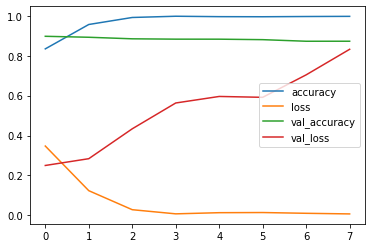

In [38]:
#print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'], label = "accuracy")
plt.plot(history.history['loss'], label = "loss")
plt.plot(history.history['val_accuracy'], label = "val_accuracy")
plt.plot(history.history['val_loss'], label = "val_loss")
plt.legend()
plt.show()

#### Investigating the missclassified results

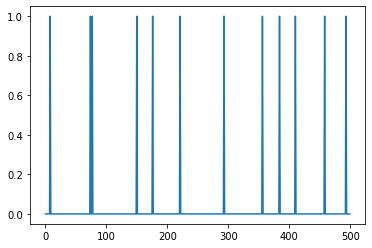

Review: 8
this movie was the most horrible movie watching experience i have ever had to endure and what is worse is the fact that i had to watch it and didn t have the opportunity to stop it because it was for school admittedly the storyline was decent but i found the acting terrible the exception was marianne jean baptiste i thought her performance was wonderful she was the only highlight without her i doubt i would have been able to bear watching the film every time i hear somebody say daarling i cringe i nearly attacked a customer the other day because they said it it made me remember one of the worst one and a half hours of my life br br i apologise if this has offended anybody i am only expressing my opinion
Correct: 0 Prediction: 1
False positive
********************
Review: 74
skip all the subjective this is a great film reviews and read the imdb trailer or the back the kino videobox which includes both versions of this flick which i ll paraphrase to the tune of sci fi score by 

/var/folders/5v/wrnrfs9x5z30cjvp_ytqb1pc0000gn/T/ipykernel_52452/3450100622.py:7: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  wrong_class=[X_train_text[i] for i in difference]


In [39]:
amount = 500
ypred = (hypermodel(X_train[:amount]).numpy() > 0.5).astype(int).reshape(amount)
difference =  ypred != y_train[:amount]
plt.plot(difference)
plt.show()
wrong_idx = list(np.where(difference)[0])
wrong_class=[X_train_text[i] for i in difference]
False_negative = 0
False_positive = 0
for i in range(0, len(wrong_idx)):
    
    print("Review:", wrong_idx[i])
    print(X_train_text[i])
    print("Correct:", y_train[wrong_idx[i]], "Prediction:",  ypred[wrong_idx[i]])
    if(y_train[wrong_idx[i]] == 1):
        print("False negative")
        False_negative += 1
    if(y_train[wrong_idx[i]] == 0):
        print("False positive")
        False_positive += 1
    print("********************")

5 7


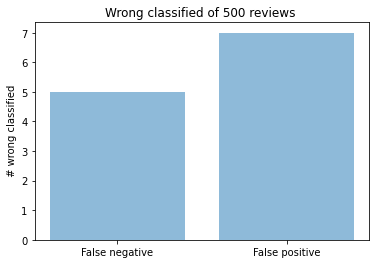

In [40]:
print(False_negative, False_positive)
objects = ('False negative', 'False positive')
y_pos = np.arange(len(objects))
performance = [False_negative, False_positive]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel(' # wrong classified')
plt.title(f'Wrong classified of {amount} reviews ')

plt.show()

### Conclusion of Task 2(b)
The optimal parameters obtained in task 2(b) were a word embedding dimension of 250 and 30 convolution filters. Those are now used in task 2(c)

## NLP Task 2-c

In [45]:
def set_elaborate_model(vocabulary, word_embedding_dim, uniform_length, conv_filters, W, L):
    inputs = Input(shape=(uniform_length,))
    x = Embedding(vocabulary, word_embedding_dim, input_length=uniform_length)(inputs)
    
    #convolutional layers
    for l in range (L):
        c = []
        for w in range(W):
            if l == 0:
                c.append(Conv1D(filters=conv_filters, kernel_size=w+1, activation='relu')(x))
            else:
                c.append(Conv1D(filters=conv_filters, kernel_size=w+1, activation='relu')(p[w]))
        p = []
        for w in range(W):    
            p.append(MaxPooling1D(pool_size=POOL_SIZE)(c[w]))

    x = Concatenate(axis=1)(p)
    x = Flatten()(x)
    x = Dense (100, activation='relu')(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=inputs, outputs=outputs)
    plot_model(model, to_file='elaborate_model.png', show_shapes=True)
    model.compile(
        #optimizer=keras.optimizers.Adam(learning_rate=lr), ### Uncomment this to tune learning rate
        optimizer='adam',
        loss="binary_crossentropy",
        metrics=["accuracy"],
    )
    return model

elaborate_model = set_elaborate_model(VOCABULARY, 200, UNIFORM_LENGTH, 30, 3, 2)

In [46]:
history = elaborate_model.fit (X_train, y_train, batch_size=BATCH_SIZE, epochs=1, validation_data=(X_test, y_test))

2500/2500 [==============================] - 221s 88ms/step - loss: 0.3131 - accuracy: 0.8581 - val_loss: 0.2537 - val_accuracy: 0.8957


In [47]:
print (history.history['val_accuracy'][-1])

0.8956999778747559


In [48]:
# grid search for W and L

W = [2, 3, 4, 5]
L = [2, 3, 4]

for w in W:
    for l in L:
            elaborate_model = set_elaborate_model(VOCABULARY, 250, UNIFORM_LENGTH, 30, w, l)
            history = elaborate_model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=1, validation_data=(X_test, y_test))
            print (f"Validation Accuracy with W={w} and L={l}: {history.history['val_accuracy'][-1]}.")

2500/2500 [==============================] - 240s 96ms/step - loss: 0.3129 - accuracy: 0.8600 - val_loss: 0.2485 - val_accuracy: 0.8988
Validation Accuracy with W=2 and L=2: 0.8988000154495239.
2500/2500 [==============================] - 263s 105ms/step - loss: 0.3284 - accuracy: 0.8506 - val_loss: 0.2624 - val_accuracy: 0.8935
Validation Accuracy with W=2 and L=3: 0.8934999704360962.
2500/2500 [==============================] - 250s 100ms/step - loss: 0.3649 - accuracy: 0.8305 - val_loss: 0.2981 - val_accuracy: 0.8742
Validation Accuracy with W=2 and L=4: 0.8741999864578247.
2500/2500 [==============================] - 266s 106ms/step - loss: 0.3081 - accuracy: 0.8644 - val_loss: 0.2361 - val_accuracy: 0.9052
Validation Accuracy with W=3 and L=2: 0.9052000045776367.
2500/2500 [==============================] - 278s 111ms/step - loss: 0.3216 - accuracy: 0.8544 - val_loss: 0.2597 - val_accuracy: 0.8938
Validation Accuracy with W=3 and L=3: 0.8938000202178955.
2500/2500 [===============

Best Validation Accuracy with W=5 and L=2: 0.9059000015258789.

In [50]:
# grid search for W and L and number of filters in convolution layer

W = [2, 3, 4, 5]
L = [2, 3, 4]
Conv_Layer = [20, 30, 40]

for w in W:
    for l in L:
        for c in Conv_Layer:
            elaborate_model = set_elaborate_model(VOCABULARY, 250, UNIFORM_LENGTH, c, w, l)
            history = elaborate_model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=1, validation_data=(X_test, y_test))
            print (f"Validation Accuracy with W={w} and L={l} and Conv_Layer={c}: {history.history['val_accuracy'][-1]}.")

2500/2500 [==============================] - 220s 88ms/step - loss: 0.3126 - accuracy: 0.8607 - val_loss: 0.2533 - val_accuracy: 0.8990
Validation Accuracy with W=2 and L=2 and Conv_Layer=20: 0.8989999890327454.
2500/2500 [==============================] - 226s 90ms/step - loss: 0.3164 - accuracy: 0.8580 - val_loss: 0.2421 - val_accuracy: 0.9017
Validation Accuracy with W=2 and L=2 and Conv_Layer=30: 0.9017000198364258.
2500/2500 [==============================] - 228s 91ms/step - loss: 0.3192 - accuracy: 0.8540 - val_loss: 0.2504 - val_accuracy: 0.8969
Validation Accuracy with W=2 and L=2 and Conv_Layer=40: 0.8968999981880188.
2500/2500 [==============================] - 219s 87ms/step - loss: 0.3412 - accuracy: 0.8420 - val_loss: 0.2810 - val_accuracy: 0.8838
Validation Accuracy with W=2 and L=3 and Conv_Layer=20: 0.8838000297546387.
2500/2500 [==============================] - 243s 97ms/step - loss: 0.3305 - accuracy: 0.8483 - val_loss: 0.2715 - val_accuracy: 0.8854
Validation Accur

Best Validation Accuracy with W=5 and L=2 and Conv_Layer=30: 0.907800018787384.

In [51]:
# Average Pooling
def set_elaborate_model(vocabulary, word_embedding_dim, uniform_length, conv_filters, W, L):
    inputs = Input(shape=(uniform_length,))
    x = Embedding(vocabulary, word_embedding_dim, input_length=uniform_length)(inputs)
    
    #convolutional layers
    for l in range (L):
        c = []
        for w in range(W):
            if l == 0:
                c.append(Conv1D(filters=conv_filters, kernel_size=w+1, activation='relu')(x))
            else:
                c.append(Conv1D(filters=conv_filters, kernel_size=w+1, activation='relu')(p[w]))
        p = []
        for w in range(W):    
            p.append(AveragePooling1D(pool_size=POOL_SIZE)(c[w]))

    x = Concatenate(axis=1)(p)
    x = Flatten()(x)
    x = Dense (100, activation='relu')(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=inputs, outputs=outputs)
    plot_model(model, to_file='elaborate_model_average.png', show_shapes=True)
    model.compile(
        #optimizer=keras.optimizers.Adam(learning_rate=lr), ### Uncomment this to tune learning rate
        optimizer='adam',
        loss="binary_crossentropy",
        metrics=["accuracy"],
    )
    return model

elaborate_model = set_elaborate_model (VOCABULARY, 250, UNIFORM_LENGTH, 30, 3, 2)

In [52]:
history = elaborate_model.fit (X_train, y_train, batch_size=BATCH_SIZE, epochs=1, validation_data=(X_test, y_test))

2500/2500 [==============================] - 243s 97ms/step - loss: 0.3115 - accuracy: 0.8615 - val_loss: 0.2417 - val_accuracy: 0.9031


In [53]:
# with a lot of regularization

def set_elaborate_model(vocabulary, word_embedding_dim, uniform_length, conv_filters, W, L):
    inputs = Input(shape=(uniform_length,))
    x = Embedding(vocabulary, word_embedding_dim, input_length=uniform_length)(inputs)
    x = Dropout (0.4)(x)

    #convolutional layers
    for l in range (L):
        c = []
        for w in range(W):
            if l == 0:
                c.append (Conv1D(filters=conv_filters, kernel_size=w+3, activation=LeakyReLU(alpha=0.1),
                          kernel_regularizer=l2(1e-4),
                          bias_regularizer=l2(1e-4),
                          activity_regularizer=l2(1e-4))(x))
            else:
                c.append (Conv1D(filters=conv_filters, kernel_size=w+3, activation=LeakyReLU(alpha=0.1),
                          kernel_regularizer=l2(1e-4),
                          bias_regularizer=l2(1e-4),
                          activity_regularizer=l2(1e-4))(p[w-1]))
        p = []
        for w in range(W):    
            p.append (MaxPooling1D(pool_size=POOL_SIZE)(c[w]))

    x = Concatenate(axis=1)(p)
    x = Flatten()(x)
    x = Dense (1000, activation=LeakyReLU(alpha=0.1), activity_regularizer=l2(1e-2))(x)
    x = Dropout (0.4)(x)
    x = Dense (100, activation=LeakyReLU(alpha=0.1), activity_regularizer=l2(1e-2))(x)
    x = Dropout (0.2)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=inputs, outputs=outputs)
    plot_model(model, to_file='elaborate_model.png', show_shapes=True)
    model.compile(
        #optimizer=keras.optimizers.Adam(learning_rate=lr), ### Uncomment this to tune learning rate
        optimizer='adam',
        loss="binary_crossentropy",
        metrics=["accuracy"],
    )
    return model

In [54]:
elaborate_model = set_elaborate_model (VOCABULARY, 250, UNIFORM_LENGTH, 30, 2, 2)
history = elaborate_model.fit (X_train, y_train, batch_size=BATCH_SIZE, epochs=3, validation_data=(X_test, y_test))

Epoch 1/3
2500/2500 [==============================] - 284s 113ms/step - loss: 0.3905 - accuracy: 0.8478 - val_loss: 0.3108 - val_accuracy: 0.8970
Epoch 2/3
2500/2500 [==============================] - 281s 113ms/step - loss: 0.2469 - accuracy: 0.9305 - val_loss: 0.3483 - val_accuracy: 0.8859
Epoch 3/3
2500/2500 [==============================] - 281s 112ms/step - loss: 0.1899 - accuracy: 0.9547 - val_loss: 0.4238 - val_accuracy: 0.8703
